In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

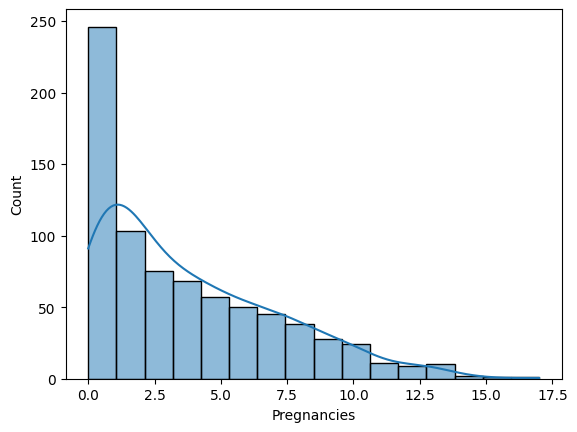

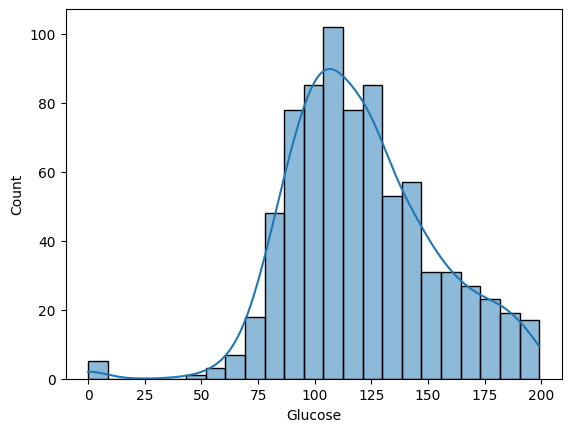

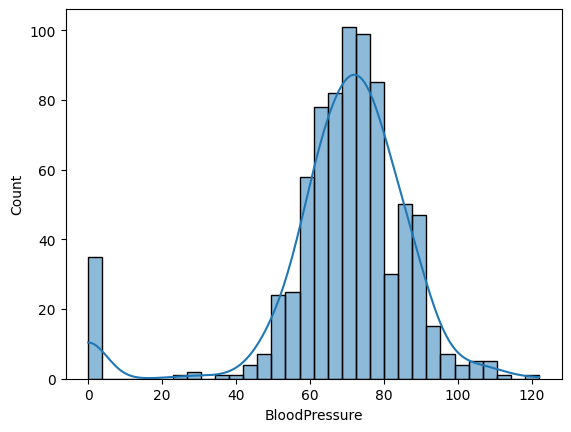

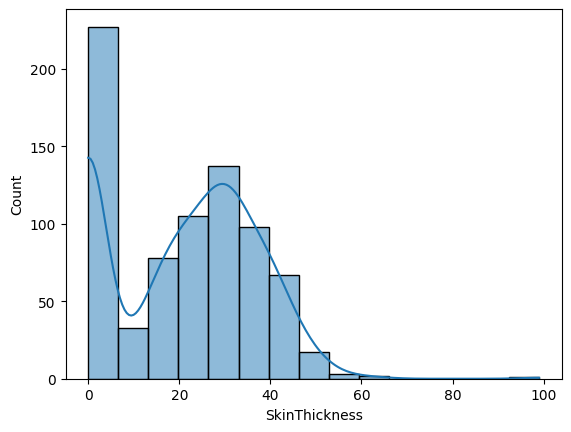

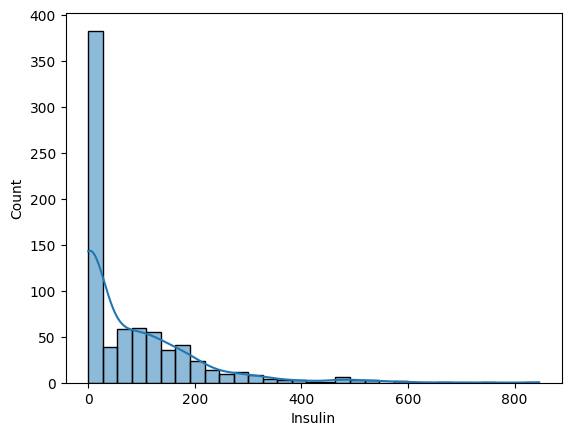

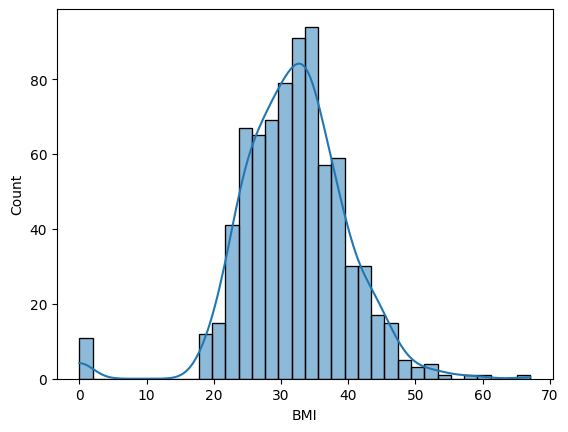

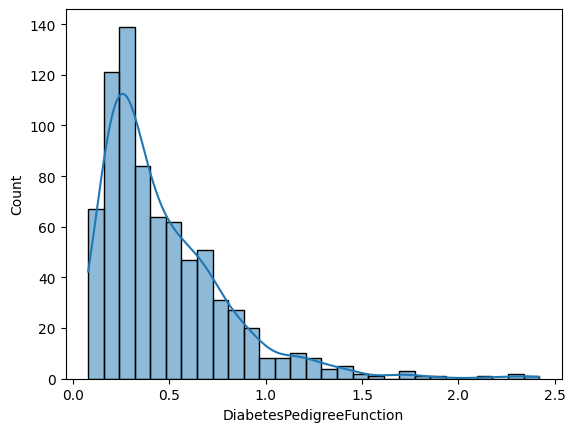

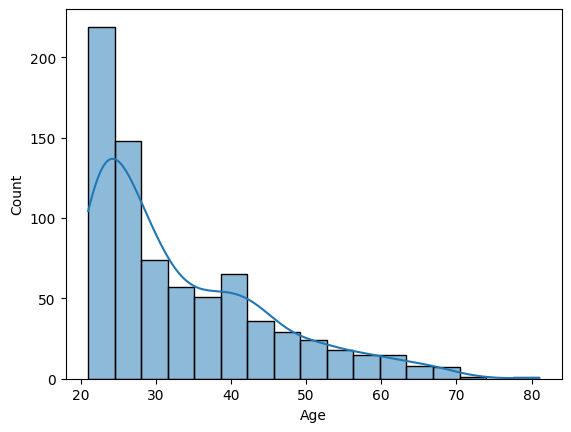

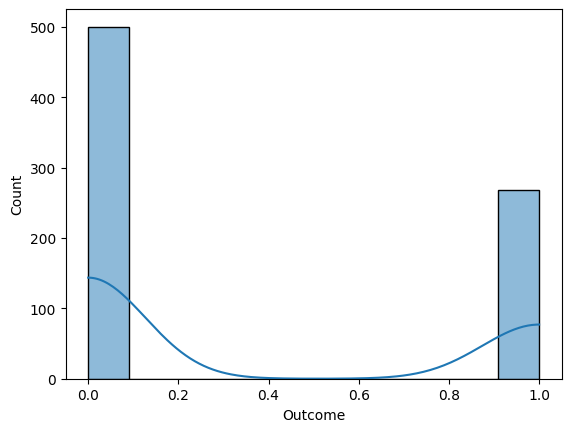

In [18]:
cols = df.columns
for i in cols:
  sns.histplot(df[i],kde = True)
  plt.show()

In [3]:
dftemp = df

In [64]:
def rem(df,threshold,col):
  index = df[df[col] < threshold].index
  df.drop(index,inplace = True)
  df.reset_index(drop = True,inplace = True)
  return df

In [67]:
df = rem(df,10,'Glucose')
df = rem(df,10,'BMI')
df = rem(df,10,'BloodPressure')

In [68]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
719,10,101,76,48,180,32.9,0.171,63,0
720,2,122,70,27,0,36.8,0.340,27,0
721,5,121,72,23,112,26.2,0.245,30,0
722,1,126,60,0,0,30.1,0.349,47,1


In [84]:
df['Insulin'].apply(lambda x: 1/np.sqrt(x))
df['Glucose'].apply(lambda x: np.sqrt(x))
df['DiabetesPedigreeFunction'].apply(lambda x: np.sqrt(np.log(x)))

0      1.885563
1      1.835019
2           NaN
3      1.770733
4      1.885563
         ...   
719    1.967537
720    1.815444
721    1.770733
722         NaN
723    1.853102
Name: SkinThickness, Length: 724, dtype: float64

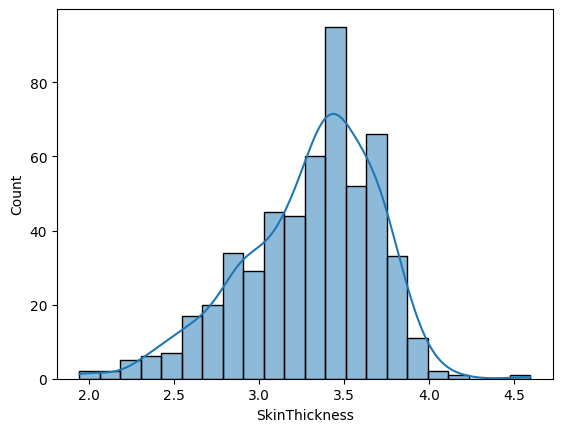

In [86]:
sns.histplot(df['SkinThickness'].apply(lambda x: np.log(x)),kde = True)
plt.show()

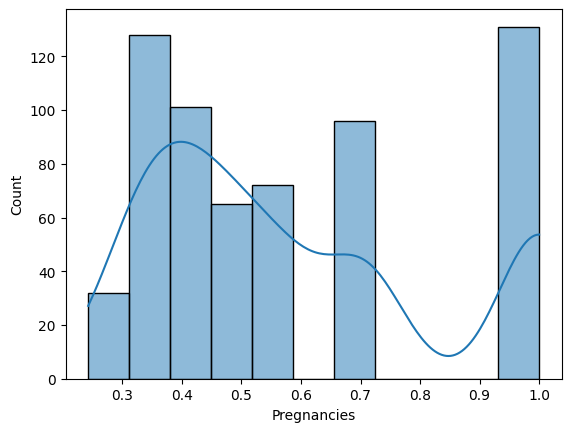

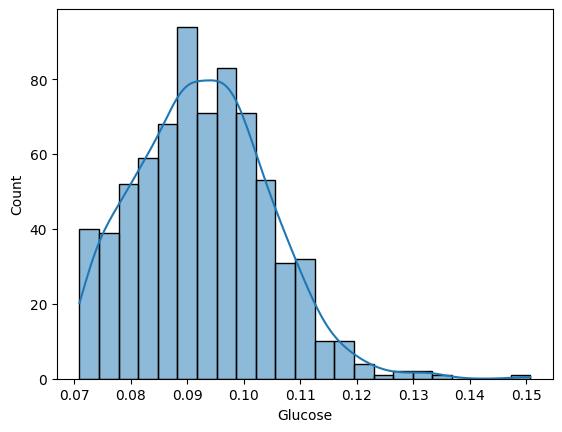

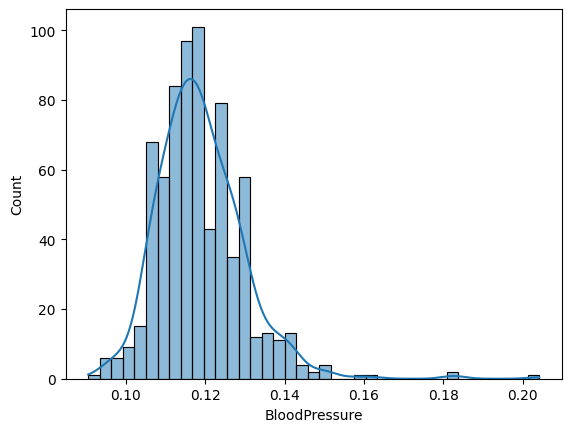

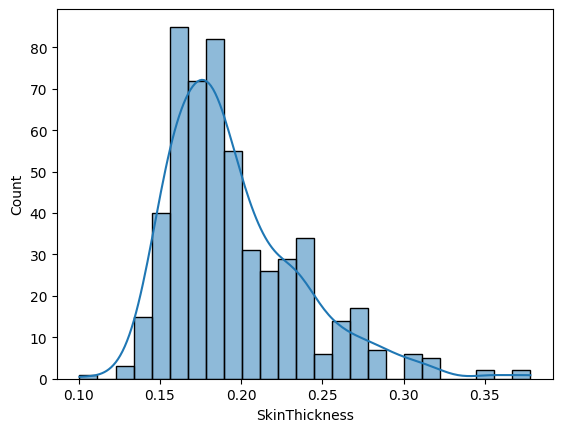

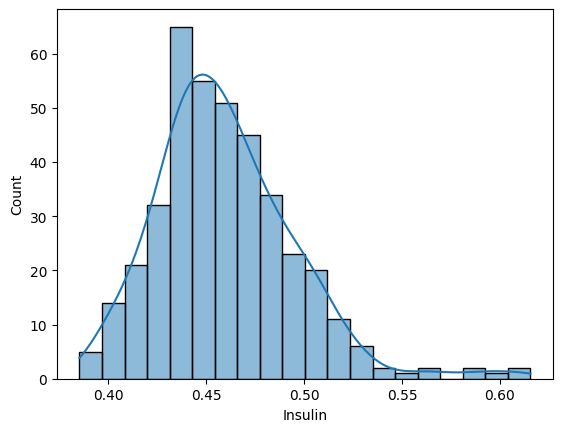

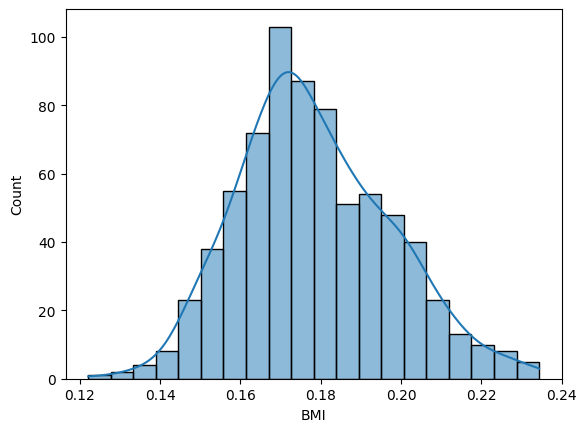

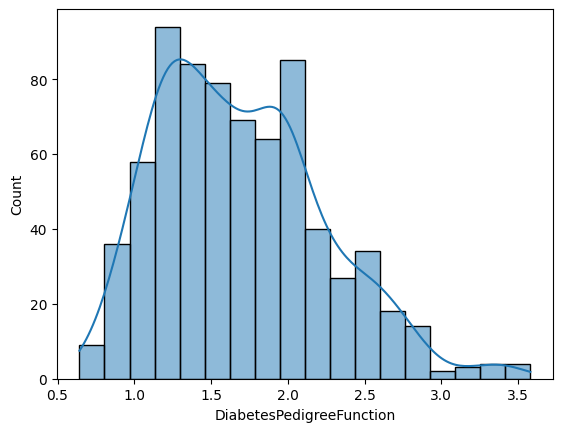

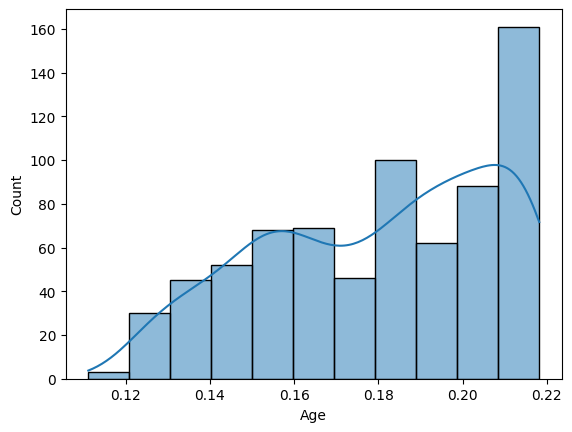

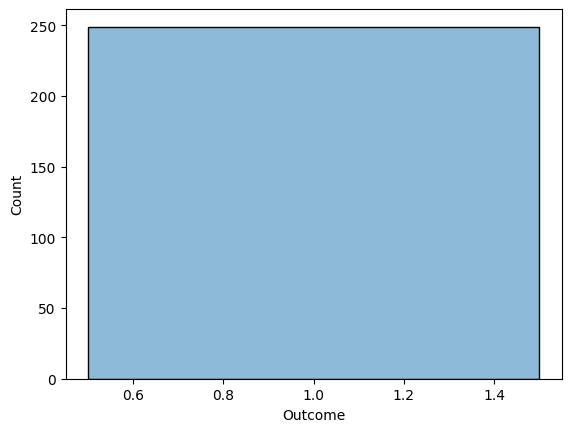

In [42]:
log_df = df.apply(lambda x: 1/np.power(x,1/2))
for i in log_df.columns:
  sns.histplot(log_df[i],kde = True)
  plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [66]:
target = df['Outcome']
features = df.drop(['Outcome'],axis = 1)
for i in range(100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,stratify = target,train_size =0.75)
    model = XGBClassifier()
    model.fit(features_train,target_train)
    predictions = model.predict(features_test)
    acc = model.score(features_test,list(target_test))
    print(acc)


0.7291666666666666
0.7552083333333334
0.7291666666666666
0.7395833333333334
0.7395833333333334
0.7552083333333334
0.703125
0.7708333333333334
0.7708333333333334
0.71875
0.75
0.7447916666666666
0.7447916666666666
0.734375
0.6979166666666666
0.7135416666666666
0.7395833333333334
0.7447916666666666
0.6822916666666666
0.75
0.7708333333333334
0.78125
0.7447916666666666
0.7552083333333334
0.75
0.734375
0.7135416666666666
0.7395833333333334
0.7395833333333334
0.75
0.7552083333333334
0.75
0.7395833333333334
0.734375
0.7708333333333334
0.7395833333333334
0.7447916666666666
0.7135416666666666
0.7916666666666666
0.6927083333333334
0.6927083333333334
0.7552083333333334
0.734375
0.7447916666666666
0.7239583333333334
0.7604166666666666
0.734375
0.7447916666666666
0.7760416666666666
0.7083333333333334
0.7708333333333334
0.7552083333333334
0.7239583333333334
0.7291666666666666
0.7604166666666666
0.7604166666666666
0.7604166666666666
0.796875
0.71875
0.71875
0.7239583333333334
0.7395833333333334
0.6822

In [7]:
import tensorflow as tf

In [8]:

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [20]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [14]:
target = df['Outcome']
features = df.drop(['Outcome'],axis = 1)

In [21]:
ds = tf.data.Dataset.from_tensor_slices((dict(features), labels))
ds = ds.shuffle(buffer_size=len(dataframe))
ds = ds.batch(batch_size)

NameError: name 'labels' is not defined

In [23]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Outcome')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [24]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [27]:
feature_columns = []

for i in features.columns:
  feature_columns.append(feature_column.numeric_column(i))

In [28]:
feature_columns

[NumericColumn(key='Pregnancies', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Glucose', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='BloodPressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SkinThickness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='DiabetesPedigreeFunction', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [30]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [34]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dropout(.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(.2),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.2),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 25ms/step - loss: 2.8182 - accuracy: 0.5255 - val_loss: 1.1948 - val_accuracy: 0.6504
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 1.0593 - accuracy: 0.5947 - val_loss: 0.7272 - val_accuracy: 0.6341
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.9152 - accuracy: 0.6517 - val_loss: 0.6490 - val_accuracy: 0.6585
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.8092 - accuracy: 0.6660 - val_loss: 0.7142 - val_accuracy: 0.6585
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.7781 - accuracy: 0.6069 - val_loss: 0.6300 - val_accuracy: 0.6585
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.7624 - accuracy: 0.6354 - val_loss: 0.6540 - val_accuracy: 0.6504
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.7031 - accuracy: 0.6802 - val_loss: 0.6505 - val_accuracy: 0.6829
Epoch 8/100